In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import *
from sklearn.feature_selection import *
from sklearn import tree
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')
df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


In [3]:
df['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

> in first 20000 rows there is only one class, and loading more is causing memory issues in later steps, so using small sections of multiple classes

In [4]:
figurative = df[df['class'] == 'figurative']
figurative = figurative[:250]

In [5]:
irony = df[df['class'] == 'irony']
irony = irony[:250]

In [6]:
regular = df[df['class'] == 'regular']
regular = regular[:250]

In [7]:
sarcasm = df[df['class'] == 'sarcasm']
sarcasm = sarcasm[:250]

In [8]:
df = pd.concat([figurative, irony, regular, sarcasm])

In [9]:
df = df.reset_index()
df

,index,tweets,class
0,0,Be aware dirty step to get money #staylight ...,figurative
1,1,#sarcasm for #people who don't understand #diy...,figurative
2,2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,3,@wilw Why do I get the feeling you like games?...,figurative
4,4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...,...
995,60972,"Nah, I'm sure they aren't mad for being ignore...",sarcasm
996,60973,thank you for ruining my day everyday 😃 #sarcasm,sarcasm
997,60974,I think it's been a pretty good day so far. #S...,sarcasm
998,60975,@akaScramz @WFODicks\n\nBOOM! \n\n#sarcasm,sarcasm


In [10]:
df.drop('index', axis=1, inplace=True)

In [11]:
df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
995,"Nah, I'm sure they aren't mad for being ignore...",sarcasm
996,thank you for ruining my day everyday 😃 #sarcasm,sarcasm
997,I think it's been a pretty good day so far. #S...,sarcasm
998,@akaScramz @WFODicks\n\nBOOM! \n\n#sarcasm,sarcasm


### Pre-processing the tweets into bag of words also removal of stop words

In [12]:
vectorizer = CountVectorizer(binary=True, stop_words="english")
X = vectorizer.fit_transform(df['tweets'])

df_tf_bag = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
df_tf_bag

,01,0734,074s7khrdm,0ah4drqvzn,0l7pp3j1ir,0lq6momnhq,0nabelaghr,0ow4s7qf3k,0vfxwic5bm,0yemvpjd3y,...,zgns8zvfjr,ziplining,zkst04vag1,zohpgmjiql,zombies,zosecretservice,zpaaryjssc,zrnulmey2o,zs15l3j5ac,сарказм
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Examine mapping of words to feature indexes

In [13]:
vectorizer.vocabulary_

{'aware': 328,
 'dirty': 1003,
 'step': 3404,
 'money': 2353,
 'staylight': 3398,
 'staywhite': 3399,
 'sarcastic': 3098,
 'moralneeded': 2361,
 'https': 1689,
 'oj6bdyx3wg': 2547,
 'sarcasm': 3097,
 'people': 2661,
 'don': 1039,
 'understand': 3777,
 'diy': 1023,
 'artattack': 282,
 'http': 1688,
 'rtyymudvus': 3064,
 'iminworkjeremy': 1749,
 'medsingle': 2272,
 'dailymail': 911,
 'readers': 2927,
 'sensible': 3161,
 'shocker': 3213,
 'dailyfail': 910,
 'inhuntspocket': 1788,
 'theyhatethenhs': 3611,
 'wilw': 3962,
 'feeling': 1288,
 'like': 2104,
 'games': 1420,
 'teacherarthurg': 3540,
 'rweingarten': 3080,
 'probably': 2807,
 'just': 1923,
 'missed': 2325,
 'text': 3576,
 'tune': 3736,
 'nigezie': 2455,
 'treated': 3705,
 'rachel': 2893,
 'platten': 2722,
 'fight': 1302,
 'song': 3312,
 'mtv': 2386,
 'reminisce': 2976,
 'amp': 224,
 'olamide': 2552,
 'local': 2134,
 'rapper': 2913,
 'irony': 1821,
 'timeschange': 3649,
 'iz': 1844,
 'thiz': 3620,
 'friggin': 1391,
 'dc': 942,
 'lov

### Forming matrix with bag of words

In [14]:
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
vectorizer

CountVectorizer(binary=True, stop_words='english')

### TF-IDF

In [16]:
vectorizer = TfidfVectorizer(norm="l1")
X = vectorizer.fit_transform(df['tweets'])
df_tf_idf = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
df_tf_idf

,01,0734,074s7khrdm,0ah4drqvzn,0l7pp3j1ir,0lq6momnhq,0nabelaghr,0ow4s7qf3k,0vfxwic5bm,0yemvpjd3y,...,zgns8zvfjr,ziplining,zkst04vag1,zohpgmjiql,zombies,zosecretservice,zpaaryjssc,zrnulmey2o,zs15l3j5ac,сарказм
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_tf_idf.apply(np.sum, axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Length: 1000, dtype: float64

In [18]:
vectorizer = TfidfVectorizer(norm=None)
X = vectorizer.fit_transform(df['tweets'])
df_tf_none = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
df_tf_none

,01,0734,074s7khrdm,0ah4drqvzn,0l7pp3j1ir,0lq6momnhq,0nabelaghr,0ow4s7qf3k,0vfxwic5bm,0yemvpjd3y,...,zgns8zvfjr,ziplining,zkst04vag1,zohpgmjiql,zombies,zosecretservice,zpaaryjssc,zrnulmey2o,zs15l3j5ac,сарказм
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Ngrams and also stop words removal

In [19]:
vectorizer = CountVectorizer(ngram_range=(1,3), stop_words="english")
X = vectorizer.fit_transform(df['tweets'])
df_tf_ngram = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
df_tf_ngram

,01,01 lancaster,01 lancaster wigan,0734,0734 north,0734 north camp,074s7khrdm,0ah4drqvzn,0l7pp3j1ir,0l7pp3j1ir http,...,zosecretservice,zosecretservice mannurse5,zosecretservice mannurse5 ken_malinowski,zpaaryjssc,zrnulmey2o,zs15l3j5ac,zs15l3j5ac irony,сарказм,сарказм sarcasm,сарказм sarcasm classic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
nltk.download('stopwords')
nltk.download('all')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]  

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\12109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already

True

In [21]:
stopwords = set(nltk.corpus.stopwords.words("english"))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Converting to lowercase, removing punctuation, tokenizing each words, POS tagging and removing stopwords from the 'tweets'

In [22]:
lower = map(str.lower, df['tweets'])

no_punc = map(lambda x: re.sub("[^a-z]", " ", x), lower)

tokenized = map(nltk.word_tokenize, no_punc)

tagged = map(nltk.pos_tag, tokenized)

stopwords = nltk.corpus.stopwords.words("english")
def remove_stopwords(doc):
    out = []
    for word in doc:
        if word[0] not in stopwords: out.append(word)
    return out

no_stopwords = list(map(remove_stopwords, tagged))

no_stopwords

[[('aware', 'JJ'),
  ('dirty', 'JJ'),
  ('step', 'NN'),
  ('get', 'VB'),
  ('money', 'NN'),
  ('staylight', 'VBN'),
  ('staywhite', 'RB'),
  ('sarcastic', 'JJ'),
  ('moralneeded', 'VBD'),
  ('https', 'NN'),
  ('co', 'NN'),
  ('oj', 'NN'),
  ('bdyx', 'NN'),
  ('wg', 'NN')],
 [('sarcasm', 'NN'),
  ('people', 'NNS'),
  ('understand', 'NN'),
  ('diy', 'NN'),
  ('artattack', 'NN'),
  ('http', 'NN'),
  ('co', 'NN'),
  ('rtyymudvus', 'NN')],
 [('iminworkjeremy', 'NN'),
  ('medsingle', 'NN'),
  ('dailymail', 'NN'),
  ('readers', 'NNS'),
  ('sensible', 'JJ'),
  ('always', 'RB'),
  ('shocker', 'NN'),
  ('sarcastic', 'JJ'),
  ('dailyfail', 'NN'),
  ('inhuntspocket', 'NN'),
  ('theyhatethenhs', 'NN')],
 [('wilw', 'NN'),
  ('get', 'VB'),
  ('feeling', 'NN'),
  ('like', 'IN'),
  ('games', 'NNS'),
  ('sarcasm', 'VBP')],
 [('teacherarthurg', 'NN'),
  ('rweingarten', 'VB'),
  ('probably', 'RB'),
  ('missed', 'VBN'),
  ('text', 'NN'),
  ('sarcastic', 'JJ')],
 [('tune', 'NN'),
  ('nigezie', 'VB'),
  ('tr

### Converting list of POS tagged words to string

In [23]:
tagged_docs = list(map(str, no_stopwords))
tagged_docs

["[('aware', 'JJ'), ('dirty', 'JJ'), ('step', 'NN'), ('get', 'VB'), ('money', 'NN'), ('staylight', 'VBN'), ('staywhite', 'RB'), ('sarcastic', 'JJ'), ('moralneeded', 'VBD'), ('https', 'NN'), ('co', 'NN'), ('oj', 'NN'), ('bdyx', 'NN'), ('wg', 'NN')]",
 "[('sarcasm', 'NN'), ('people', 'NNS'), ('understand', 'NN'), ('diy', 'NN'), ('artattack', 'NN'), ('http', 'NN'), ('co', 'NN'), ('rtyymudvus', 'NN')]",
 "[('iminworkjeremy', 'NN'), ('medsingle', 'NN'), ('dailymail', 'NN'), ('readers', 'NNS'), ('sensible', 'JJ'), ('always', 'RB'), ('shocker', 'NN'), ('sarcastic', 'JJ'), ('dailyfail', 'NN'), ('inhuntspocket', 'NN'), ('theyhatethenhs', 'NN')]",
 "[('wilw', 'NN'), ('get', 'VB'), ('feeling', 'NN'), ('like', 'IN'), ('games', 'NNS'), ('sarcasm', 'VBP')]",
 "[('teacherarthurg', 'NN'), ('rweingarten', 'VB'), ('probably', 'RB'), ('missed', 'VBN'), ('text', 'NN'), ('sarcastic', 'JJ')]",
 "[('tune', 'NN'), ('nigezie', 'VB'), ('treated', 'VBN'), ('rachel', 'VB'), ('platten', 'JJ'), ('fight', 'NN'), ('s

In [24]:
vectorizer = CountVectorizer(token_pattern=r"\('[^ ]+', '[^ ]+'\)", lowercase=False)
X = vectorizer.fit_transform(tagged_docs)
df_tf_POS = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
df_tf_POS

,"('aa', 'NN')","('aaaaakkkk', 'NN')","('aamir', 'NN')","('abbyglassenberg', 'JJ')","('abc', 'NN')","('abcnewsbreakfast', 'NN')","('abcnpjtjeg', 'NN')","('aboard', 'IN')","('aboutthatlife', 'IN')","('absolutely', 'RB')",...,"('zosecretservice', 'NN')","('zpaaryjssc', 'NN')","('zqg', 'NN')","('zrbc', 'NN')","('zrnulmey', 'NN')","('zs', 'NN')","('zsszqk', 'NN')","('zvfjr', 'NN')","('zw', 'NN')","('zy', 'NN')"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Applying machine learning models using bag of words: df_tf_bag

### Partition the dataset to 70% training data and 30% testing data

In [25]:
train_x, test_x, train_y, test_y = train_test_split(df_tf_bag, df["class"], test_size=0.3, random_state=0)

df_train_x = pd.DataFrame(train_x, columns=df_tf_bag.columns)
df_test_x = pd.DataFrame(test_x, columns=df_tf_bag.columns)
df_train_y = pd.DataFrame(train_y, columns=["class"])
df_test_y = pd.DataFrame(test_y, columns=["class"])

In [26]:
print (df_train_x.shape)
print (df_test_x.shape)
print (df_train_y.shape)
print (df_test_y.shape)

(700, 4114)
(300, 4114)
(700, 1)
(300, 1)


In [27]:
print (df["class"].value_counts())
print (df_train_y["class"].value_counts())
print (df_test_y["class"].value_counts())

figurative    250
irony         250
regular       250
sarcasm       250
Name: class, dtype: int64
figurative    188
regular       178
irony         168
sarcasm       166
Name: class, dtype: int64
sarcasm       84
irony         82
regular       72
figurative    62
Name: class, dtype: int64


### Decision Tree

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

In [29]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.62
accuracy:0.62
precision:0.62
recall:0.62


### LinearSVC

In [30]:
clf = LinearSVC()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

In [31]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.6166666666666667
accuracy:0.6166666666666667
precision:0.6166666666666667
recall:0.6166666666666667


### Multinomial Naive Bayes

In [32]:
clf = MultinomialNB()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

In [33]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.5933333333333334
accuracy:0.5933333333333334
precision:0.5933333333333334
recall:0.5933333333333334


### Logistic Regression

In [34]:
clf = LogisticRegression()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

In [35]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.6266666666666667
accuracy:0.6266666666666667
precision:0.6266666666666667
recall:0.6266666666666667


### Creating model with feature selection

In [36]:
f_val, p_val = chi2(df_train_x, df_train_y["class"]) 

df_scores = pd.DataFrame(zip(df_tf_bag, f_val, p_val), columns=["feature", "chi2", "p"])
df_scores["chi2"] = df_scores["chi2"].round(2)
df_scores["p"] = df_scores["p"].round(3)

sel_cols = df_scores[df_scores["p"]<0.05]["feature"].values
print ("\nSelected features: %d" % len(sel_cols))
print (sel_cols)


Selected features: 49
['25' '40' 'alarm' 'ashleymadison' 'autocorrect' 'blatter' 'bus' 'coffee'
 'copywriting' 'day' 'drugs' 'fan' 'feel' 'girl' 'gop' 'great' 'head'
 'hour' 'https' 'imagine' 'interesting' 'ironic' 'irony' 'isis' 'late'
 'lines' 'look' 'minutes' 'model' 'morning' 'night' 'pic' 'post'
 'proofreading' 'really' 'rights' 'sarcasm' 'sarcastic' 'saudiarabia'
 'says' 'sleep' 'subediting' 'train' 'typo' 've' 'went' 'wish'
 'wwebattleground' 'yes']


### LinearSVC

In [37]:
clf = LinearSVC()
clf = clf.fit(df_train_x[sel_cols], train_y)
pred_y = clf.predict(df_test_x[sel_cols])

In [38]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.75
accuracy:0.75
precision:0.75
recall:0.75


### Decision Tree

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_train_x[sel_cols], train_y)
pred_y = clf.predict(df_test_x[sel_cols])

In [40]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.7299999999999999
accuracy:0.73
precision:0.73
recall:0.73


### Logistic Regression

In [41]:
clf = LogisticRegression()
clf = clf.fit(df_train_x[sel_cols], train_y)
pred_y = clf.predict(df_test_x[sel_cols])

In [42]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.7533333333333333
accuracy:0.7533333333333333
precision:0.7533333333333333
recall:0.7533333333333333


### Multinomial Naive Bayes

In [43]:
clf = MultinomialNB()
clf = clf.fit(df_train_x[sel_cols], train_y)
pred_y = clf.predict(df_test_x[sel_cols])

In [44]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.76
accuracy:0.76
precision:0.76
recall:0.76


### Cross Validation and Fine Tuning the model with feature selection

In [45]:

skf = StratifiedKFold(n_splits=5, random_state=None)

fold = 0
f1 = []
precision =[]
recall=[]
accuracy=[]
features = []
for train_index, test_index in skf.split(df_tf_bag,df["class"]):
    fold += 1
    print ("Fold %d" % fold)
    # partition
    train_x, test_x = df_tf_bag.iloc[train_index], df_tf_bag.iloc[test_index]
    train_y, test_y = df["class"].iloc[train_index], df["class"].iloc[test_index]
    
    # vectorize
    #vectorizer = CountVectorizer(tokenizer=tokenize, binary=True, stop_words='english')
    #X = vectorizer.fit_transform(train_x)
    X = train_x
    #X_test = vectorizer.transform(test_x)
    X_test = test_x
    
    # convert numpy arrays to data frames
    df_train_x = pd.DataFrame(train_x, columns=df_tf_bag.columns)
    df_test_x = pd.DataFrame(test_x, columns=df_tf_bag.columns)
    df_train_y = pd.DataFrame(train_y, columns=["class"])
    df_test_y = pd.DataFrame(test_y, columns=["class"])
    
    #feature selection
    f_val, p_val = chi2(df_train_x, df_train_y["class"]) 
    #f_val, p_val = chi2(train_x, train_y["ReviewRate "]) 

    # print the Chi-squared valus and p values
    df_scores = pd.DataFrame(zip(df_tf_bag.columns, f_val, p_val), columns=["feature", "chi2", "p"])
    df_scores["chi2"] = df_scores["chi2"].round(2)
    df_scores["p"] = df_scores["p"].round(3)
    #print df_scores.sort_values("chi2", ascending=False)

    # use features with p < 0.05
    sel_ohe_cols = df_scores[df_scores["p"]<0.05]["feature"].values
    
    # train model
    
    clf = LogisticRegression(random_state=fold)
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
    grid_clf_acc.fit(X[sel_ohe_cols], train_y)
    #grid_clf_acc.fit(X, train_y)
    
    
    
    #clf.fit(X[sel_ohe_cols], train_y)
    # predict
    pred=grid_clf_acc.predict(X_test[sel_ohe_cols])
    #pred = clf.predict(X_test[sel_ohe_cols])
    # classification results
    for line in metrics.classification_report(test_y, pred).split("\n"):
        print (line)
    f1.append(metrics.f1_score(test_y, pred, average="micro"))
    precision.append(metrics.precision_score(test_y, pred, average="micro"))
    recall.append(metrics.recall_score(test_y, pred, average="micro"))
    accuracy.append(metrics.accuracy_score(test_y, pred))
    #features.append(len(vectorizer.vocabulary_))
    
print ("Average F1: %.2f" % np.mean(f1))
print ("Average prcesion: %.2f" % np.mean(precision))
print ("Average recall: %.2f" % np.mean(recall))
print ("Average accuracy: %.2f" % np.mean(accuracy))
#print ("Average F1: %.2f" % np.mean(features))

Fold 1
              precision    recall  f1-score   support

  figurative       0.00      0.00      0.00        50
       irony       0.96      1.00      0.98        50
     regular       0.89      1.00      0.94        50
     sarcasm       0.51      0.94      0.66        50

    accuracy                           0.73       200
   macro avg       0.59      0.73      0.65       200
weighted avg       0.59      0.73      0.65       200

Fold 2
              precision    recall  f1-score   support

  figurative       0.30      0.06      0.10        50
       irony       0.70      1.00      0.83        50
     regular       0.98      1.00      0.99        50
     sarcasm       0.63      0.86      0.73        50

    accuracy                           0.73       200
   macro avg       0.65      0.73      0.66       200
weighted avg       0.65      0.73      0.66       200

Fold 3
              precision    recall  f1-score   support

  figurative       0.20      0.02      0.04        50


### Artificial Neural Networks

In [46]:
input_dim = train_x.shape[1]
input_dim

4114

In [47]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                41150     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41,161
Trainable params: 41,161
Non-trainable params: 0
_________________________________________________________________


In [50]:
mapper = {item: i for i, item in enumerate(train_y.unique())}
mapper

{'figurative': 0, 'irony': 1, 'regular': 2, 'sarcasm': 3}

In [51]:
train_y = train_y.map(mapper)
train_y

0      0
1      0
2      0
3      0
4      0
      ..
945    3
946    3
947    3
948    3
949    3
Name: class, Length: 800, dtype: int64

In [52]:
test_y = test_y.map(mapper)
test_y

200    0
201    0
202    0
203    0
204    0
      ..
995    3
996    3
997    3
998    3
999    3
Name: class, Length: 200, dtype: int64

In [53]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

In [54]:
history = model.fit(train_x, train_y, epochs=100, verbose=False, validation_data=(test_x, test_y), batch_size=10)
history

In [55]:
history.params

{'verbose': False, 'epochs': 100, 'steps': 80}

In [56]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.470407,0.25375,0.196342,0.250
1,-0.177038,0.25000,-0.364790,0.250
2,-0.906212,0.25000,-0.947702,0.250
3,-1.702020,0.25000,-1.556646,0.250
4,-2.611904,0.25000,-2.230289,0.250
...,...,...,...,...
95,-799.941223,0.23875,-490.414917,0.235
96,-814.525085,0.24125,-499.023163,0.235
97,-829.298767,0.23250,-507.969574,0.235
98,-844.083252,0.22875,-516.788269,0.235


In [57]:
history.history['accuracy']

[0.2537499964237213,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.2512499988079071,
 0.2462500035762787,
 0.24375000596046448,
 0.24250000715255737,
 0.2462500035762787,
 0.23749999701976776,
 0.2462500035762787,
 0.24500000476837158,
 0.24124999344348907,
 0.23999999463558197,
 0.23624999821186066,
 0.23624999821186066,
 0.23499999940395355,
 0.23874999582767487,
 0.23499999940395355,
 0.24124999344348907,
 0.23749999701976776,
 0.24375000596046448,
 0.24124999344348907,
 0.23874999582767487,
 0.23874999582767487,
 0.23999999463558197,
 0.23499999940395355,
 0.24124999344348907,
 0.24250000715255737,
 0.23749999701976776,
 0.24250000715255737,
 0.24250000715255737,
 0.2462500035762787,
 0.23874999582767487,
 0.23250000178813934,
 0.24500000476837158,
 0.23250000178813934,
 0.24500000476837158,
 0.23749999701976776,
 0.23499999940395355,
 0.23375000059604645,
 0.23999999463558197,
 0.23499999940395355,
 0.24124999344348907,
 0.24124999344348907,
 0.23250000178813934,
 0.24500000

In [58]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

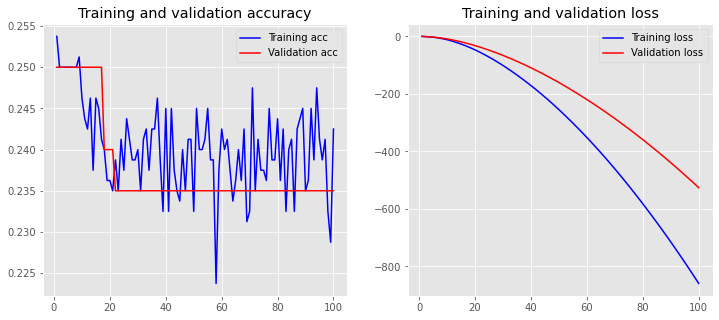

In [59]:
plot_history(history)

In [60]:
loss, accuracy = model.evaluate(train_x, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.2637
Testing Accuracy:  0.2350


### Applying machine learning models using Ngram: df_tf_ngram

### Partition the dataset to 70% training data and 30% testing data

In [61]:
train_x, test_x, train_y, test_y = train_test_split(df_tf_ngram, df["class"], test_size=0.3, random_state=0)

df_train_x = pd.DataFrame(train_x, columns=df_tf_ngram.columns)
df_test_x = pd.DataFrame(test_x, columns=df_tf_ngram.columns)
df_train_y = pd.DataFrame(train_y, columns=["class"])
df_test_y = pd.DataFrame(test_y, columns=["class"])

In [62]:
print (df_train_x.shape)
print (df_test_x.shape)
print (df_train_y.shape)
print (df_test_y.shape)

(700, 17179)
(300, 17179)
(700, 1)
(300, 1)


In [63]:
print (df["class"].value_counts())
print (df_train_y["class"].value_counts())
print (df_test_y["class"].value_counts())

figurative    250
irony         250
regular       250
sarcasm       250
Name: class, dtype: int64
figurative    188
regular       178
irony         168
sarcasm       166
Name: class, dtype: int64
sarcasm       84
irony         82
regular       72
figurative    62
Name: class, dtype: int64


### Decision Tree

In [64]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

In [65]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.61
accuracy:0.61
precision:0.61
recall:0.61


### LinearSVC

In [66]:
clf = LinearSVC()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

In [67]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.6566666666666666
accuracy:0.6566666666666666
precision:0.6566666666666666
recall:0.6566666666666666


### Multinomial Naive Bayes

In [68]:
clf = MultinomialNB()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

In [69]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.6033333333333334
accuracy:0.6033333333333334
precision:0.6033333333333334
recall:0.6033333333333334


### Logistic Regression

In [70]:
clf = LogisticRegression()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

In [71]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.6533333333333333
accuracy:0.6533333333333333
precision:0.6533333333333333
recall:0.6533333333333333


### Creating model with feature selection

In [72]:
f_val, p_val = chi2(df_train_x, df_train_y["class"]) 

df_scores = pd.DataFrame(zip(df_tf_ngram, f_val, p_val), columns=["feature", "chi2", "p"])
df_scores["chi2"] = df_scores["chi2"].round(2)
df_scores["p"] = df_scores["p"].round(3)

sel_cols = df_scores[df_scores["p"]<0.05]["feature"].values
print ("\nSelected features: %d" % len(sel_cols))
print (sel_cols)


Selected features: 93
['25' '40' 'alarm' 'ashleymadison' 'autocorrect' 'autocorrect copywriting'
 'autocorrect copywriting irony' 'blatter' 'bus' 'coffee' 'copywriting'
 'copywriting irony' 'copywriting irony proofreading' 'day' 'day late'
 'drugs' 'fallon' 'fan' 'feel' 'flag' 'girl' 'good thing' 'gop' 'great'
 'head' 'head lines' 'head lines http' 'hour' 'https' 'imagine'
 'interesting' 'ironic' 'irony' 'irony http' 'irony https'
 'irony proofreading' 'irony proofreading saudiarabia' 'isis' 'jimmy'
 'jimmy fallon' 'late' 'late dinner' 'late http' 'late https' 'late night'
 'late night radio' 'late post' 'lines' 'lines http' 'lol irony' 'look'
 'love people' 'minutes' 'model' 'money' 'morning' 'music' 'night'
 'night radio' 'oh irony' 'ooo' 'pic' 'pic https' 'post' 'proofreading'
 'proofreading saudiarabia' 'proofreading saudiarabia subediting' 'really'
 'right sarcasm' 'rights' 'sarcasm' 'sarcasm http' 'sarcasm https'
 'sarcastic' 'saudiarabia' 'saudiarabia subediting'
 'saudiarabia 

### LinearSVC

In [73]:
clf = LinearSVC()
clf = clf.fit(df_train_x[sel_cols], train_y)
pred_y = clf.predict(df_test_x[sel_cols])

In [74]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.7233333333333334
accuracy:0.7233333333333334
precision:0.7233333333333334
recall:0.7233333333333334


### Decision Tree

In [75]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_train_x[sel_cols], train_y)
pred_y = clf.predict(df_test_x[sel_cols])

In [76]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.7133333333333335
accuracy:0.7133333333333334
precision:0.7133333333333334
recall:0.7133333333333334


### Logistic Regression

In [77]:
clf = LogisticRegression()
clf = clf.fit(df_train_x[sel_cols], train_y)
pred_y = clf.predict(df_test_x[sel_cols])

In [78]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.7266666666666666
accuracy:0.7266666666666667
precision:0.7266666666666667
recall:0.7266666666666667


### Multinomial Naive Bayes

In [79]:
clf = MultinomialNB()
clf = clf.fit(df_train_x[sel_cols], train_y)
pred_y = clf.predict(df_test_x[sel_cols])

In [80]:
print ("f1:" + str(f1_score(pred_y, test_y, average="micro")))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y, average="micro")))
print ("recall:" + str(recall_score(pred_y, test_y, average="micro")))

f1:0.75
accuracy:0.75
precision:0.75
recall:0.75


### Cross Validation and Fine Tuning the model with feature selection

In [81]:

skf = StratifiedKFold(n_splits=5, random_state=None)

fold = 0
f1 = []
precision =[]
recall=[]
accuracy=[]
features = []
for train_index, test_index in skf.split(df_tf_ngram,df["class"]):
    fold += 1
    print ("Fold %d" % fold)
    # partition
    train_x, test_x = df_tf_ngram.iloc[train_index], df_tf_ngram.iloc[test_index]
    train_y, test_y = df["class"].iloc[train_index], df["class"].iloc[test_index]
    
    # vectorize
    #vectorizer = CountVectorizer(tokenizer=tokenize, binary=True, stop_words='english')
    #X = vectorizer.fit_transform(train_x)
    X = train_x
    #X_test = vectorizer.transform(test_x)
    X_test = test_x
    
    # convert numpy arrays to data frames
    df_train_x = pd.DataFrame(train_x, columns=df_tf_ngram.columns)
    df_test_x = pd.DataFrame(test_x, columns=df_tf_ngram.columns)
    df_train_y = pd.DataFrame(train_y, columns=["class"])
    df_test_y = pd.DataFrame(test_y, columns=["class"])
    
    #feature selection
    f_val, p_val = chi2(df_train_x, df_train_y["class"]) 
    #f_val, p_val = chi2(train_x, train_y["ReviewRate "]) 

    # print the Chi-squared valus and p values
    df_scores = pd.DataFrame(zip(df_tf_ngram.columns, f_val, p_val), columns=["feature", "chi2", "p"])
    df_scores["chi2"] = df_scores["chi2"].round(2)
    df_scores["p"] = df_scores["p"].round(3)
    #print df_scores.sort_values("chi2", ascending=False)

    # use features with p < 0.05
    sel_ohe_cols = df_scores[df_scores["p"]<0.05]["feature"].values
    
    # train model
    
    clf = LogisticRegression(random_state=fold)
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
    grid_clf_acc.fit(X[sel_ohe_cols], train_y)
    #grid_clf_acc.fit(X, train_y)
    
    
    
    #clf.fit(X[sel_ohe_cols], train_y)
    # predict
    pred=grid_clf_acc.predict(X_test[sel_ohe_cols])
    #pred = clf.predict(X_test[sel_ohe_cols])
    # classification results
    for line in metrics.classification_report(test_y, pred).split("\n"):
        print (line)
    f1.append(metrics.f1_score(test_y, pred, average="micro"))
    precision.append(metrics.precision_score(test_y, pred, average="micro"))
    recall.append(metrics.recall_score(test_y, pred, average="micro"))
    accuracy.append(metrics.accuracy_score(test_y, pred))
    #features.append(len(vectorizer.vocabulary_))
    
print ("Average F1: %.2f" % np.mean(f1))
print ("Average prcesion: %.2f" % np.mean(precision))
print ("Average recall: %.2f" % np.mean(recall))
print ("Average accuracy: %.2f" % np.mean(accuracy))
#print ("Average F1: %.2f" % np.mean(features))

Fold 1
              precision    recall  f1-score   support

  figurative       0.00      0.00      0.00        50
       irony       0.96      1.00      0.98        50
     regular       0.89      1.00      0.94        50
     sarcasm       0.51      0.94      0.66        50

    accuracy                           0.73       200
   macro avg       0.59      0.73      0.65       200
weighted avg       0.59      0.73      0.65       200

Fold 2
              precision    recall  f1-score   support

  figurative       0.25      0.06      0.10        50
       irony       0.70      1.00      0.83        50
     regular       0.98      1.00      0.99        50
     sarcasm       0.62      0.82      0.71        50

    accuracy                           0.72       200
   macro avg       0.64      0.72      0.66       200
weighted avg       0.64      0.72      0.66       200

Fold 3
              precision    recall  f1-score   support

  figurative       0.25      0.10      0.14        50


### Artificial Neural Networks

In [83]:
input_dim = train_x.shape[1]
input_dim

17179

In [84]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [85]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                171800    
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171,811
Trainable params: 171,811
Non-trainable params: 0
_________________________________________________________________


In [87]:
mapper = {item: i for i, item in enumerate(train_y.unique())}
mapper

{'figurative': 0, 'irony': 1, 'regular': 2, 'sarcasm': 3}

In [88]:
train_y = train_y.map(mapper)
train_y

0      0
1      0
2      0
3      0
4      0
      ..
945    3
946    3
947    3
948    3
949    3
Name: class, Length: 800, dtype: int64

In [89]:
test_y = test_y.map(mapper)
test_y

200    0
201    0
202    0
203    0
204    0
      ..
995    3
996    3
997    3
998    3
999    3
Name: class, Length: 200, dtype: int64

In [90]:
history = model.fit(train_x, train_y, epochs=100, verbose=False, validation_data=(test_x, test_y), batch_size=10)
history

In [91]:
history.params

{'verbose': False, 'epochs': 100, 'steps': 80}

In [92]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.634976,0.23500,0.517105,0.25
1,0.260102,0.25875,0.226850,0.25
2,-0.296799,0.27125,-0.112383,0.25
3,-0.972907,0.27375,-0.490421,0.25
4,-1.747555,0.28125,-0.876758,0.25
...,...,...,...,...
95,-570.152283,0.30750,-203.262543,0.25
96,-580.622803,0.30500,-207.330612,0.25
97,-591.198669,0.30125,-210.855591,0.25
98,-601.820251,0.30375,-214.314590,0.25


In [93]:
history.history['accuracy']

[0.23499999940395355,
 0.25874999165534973,
 0.27125000953674316,
 0.2737500071525574,
 0.28125,
 0.2824999988079071,
 0.29374998807907104,
 0.29875001311302185,
 0.2862499952316284,
 0.29875001311302185,
 0.29249998927116394,
 0.29249998927116394,
 0.2874999940395355,
 0.30000001192092896,
 0.29624998569488525,
 0.29750001430511475,
 0.29750001430511475,
 0.29499998688697815,
 0.29750001430511475,
 0.29624998569488525,
 0.29124999046325684,
 0.29249998927116394,
 0.29249998927116394,
 0.29750001430511475,
 0.2862499952316284,
 0.30000001192092896,
 0.29624998569488525,
 0.29875001311302185,
 0.30125001072883606,
 0.29624998569488525,
 0.29624998569488525,
 0.30125001072883606,
 0.30125001072883606,
 0.29499998688697815,
 0.30000001192092896,
 0.30125001072883606,
 0.30000001192092896,
 0.29499998688697815,
 0.29875001311302185,
 0.30125001072883606,
 0.3100000023841858,
 0.30250000953674316,
 0.29499998688697815,
 0.29750001430511475,
 0.3149999976158142,
 0.29499998688697815,
 0.3100

In [94]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

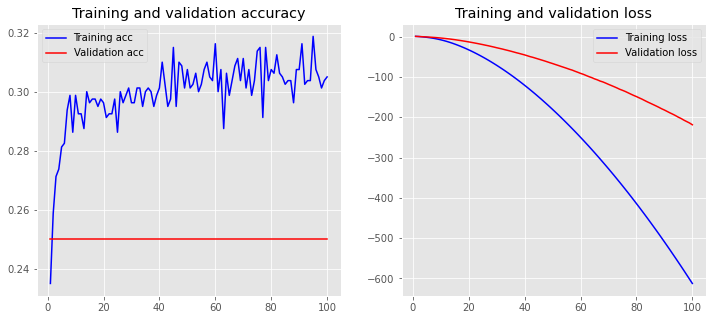

In [95]:
plot_history(history)

In [96]:
loss, accuracy = model.evaluate(train_x, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.3388
Testing Accuracy:  0.2500
